<a href="https://colab.research.google.com/github/rhodyapps/ml-notebooks/blob/main/Copy_of_TN_project1_LinearRegression_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Course 4 Project 1 - Linear Regression*

Description

The HR department wants to analyze how employee age and experience influence income levels. This information will help design fair and equitable salary structures, which could improve employee satisfaction and retention.

Objective: Predict employee income to assist in strategic decision-making for salary adjustments and structure, ensuring fair compensation practices that improve retention and job satisfaction.

Steps to Perform:

1. Data Quality Check: Verify that there are no missing values to ensure data completeness.
2. Feature Engineering: Apply transformations and scaling to features to highlight important patterns in the data.
3. Data Splitting: Divide the dataset into training and testing sets to allow for effective model evaluation.
4. Model Training: Train various regression models to find the best predictor of employee income.
5. Model Evaluation: Assess the accuracy and performance of each model using statistical measures.
6. Result Interpretation: Analyze and compare predicted outcomes with actual data to evaluate model predictions.

Source Dataset: Multiple_linear_regression_dataset.csv

GOAL:

What we will learn:
    * After checking out data as we have so many times in the past,
    * We will build a linear regression model (actually a multi-variate regression model)
    * We will evaluate the quality of the model

# Thomas Newman, Course 4 - Project 1

In [ ]:
# import libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Step 1: Data Quality Check: Verify that there are no missing values to ensure data completeness.

In [ ]:
df_data = pd.read_csv("project1_data.csv")

df_data.head()
print(df_data)

    age  experience  income
0    25           1   30450
1    30           3   35670
2    47           2   31580
3    32           5   40130
4    43          10   47830
5    51           7   41630
6    28           5   41340
7    33           4   37650
8    37           5   40250
9    39           8   45150
10   29           1   27840
11   47           9   46110
12   54           5   36720
13   51           4   34800
14   44          12   51300
15   41           6   38900
16   58          17   63600
17   23           1   30870
18   44           9   44190
19   37          10   48700


In [ ]:
display(df_data.shape)
display(df_data.info())
display(df_data.describe())

(20, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         20 non-null     int64
 1   experience  20 non-null     int64
 2   income      20 non-null     int64
dtypes: int64(3)
memory usage: 612.0 bytes


None

,age,experience,income
count,20.000000,20.000000,20.000000
mean,39.650000,6.200000,40735.500000
std,10.027725,4.124382,8439.797625
min,23.000000,1.000000,27840.000000
25%,31.500000,3.750000,35452.500000
50%,40.000000,5.000000,40190.000000
75%,47.000000,9.000000,45390.000000
max,58.000000,17.000000,63600.000000


In [ ]:
# Step 2: Feature Engineering: Apply transformations and scaling to features to highlight important patterns in the data.
# For this step we will change the age experience and income from int to float.


In [ ]:
# Example 2: Convert multiple columns from int to float
df_data = df_data.astype({'age':'float','experience':'float', 'income':'float'})


In [ ]:
# Lets look at our data again and see if the int types are changed to float and we have 21 rows of data
display(df_data.shape)
display(df_data.info())
display(df_data.describe())
print(df_data)

(20, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         20 non-null     float64
 1   experience  20 non-null     float64
 2   income      20 non-null     float64
dtypes: float64(3)
memory usage: 612.0 bytes


None

,age,experience,income
count,20.000000,20.000000,20.000000
mean,39.650000,6.200000,40735.500000
std,10.027725,4.124382,8439.797625
min,23.000000,1.000000,27840.000000
25%,31.500000,3.750000,35452.500000
50%,40.000000,5.000000,40190.000000
75%,47.000000,9.000000,45390.000000
max,58.000000,17.000000,63600.000000


     age  experience   income
0   25.0         1.0  30450.0
1   30.0         3.0  35670.0
2   47.0         2.0  31580.0
3   32.0         5.0  40130.0
4   43.0        10.0  47830.0
5   51.0         7.0  41630.0
6   28.0         5.0  41340.0
7   33.0         4.0  37650.0
8   37.0         5.0  40250.0
9   39.0         8.0  45150.0
10  29.0         1.0  27840.0
11  47.0         9.0  46110.0
12  54.0         5.0  36720.0
13  51.0         4.0  34800.0
14  44.0        12.0  51300.0
15  41.0         6.0  38900.0
16  58.0        17.0  63600.0
17  23.0         1.0  30870.0
18  44.0         9.0  44190.0
19  37.0        10.0  48700.0


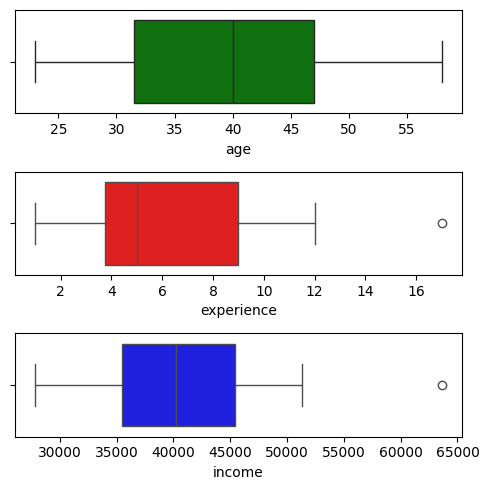

In [ ]:
#Let's start looking into our Ouliers on each column
fig, axs = plt.subplots(3, figsize=(5,5))
plt1 = sns.boxplot(df_data["age"], ax=axs[0], orient="h", color="g")
plt2 = sns.boxplot(df_data["experience"], ax=axs[1], orient="h", color="r")
plt3 = sns.boxplot(df_data["income"], ax=axs[2], orient="h", color="b")
plt.tight_layout()

In [ ]:
# The outlier is one employee with 17 years experience and $63,600.00 income. This seems reasonable so we wont change it

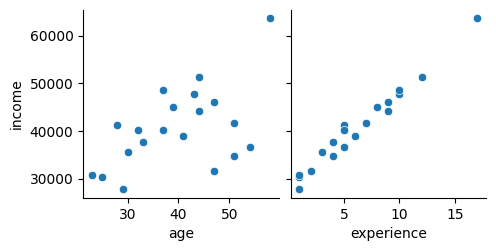

In [ ]:
sns.pairplot(df_data, x_vars=["age", "experience"], y_vars="income")

In [ ]:
# Appears to be a strong relationship between experience and income. That seems reasonable.

<Axes: >

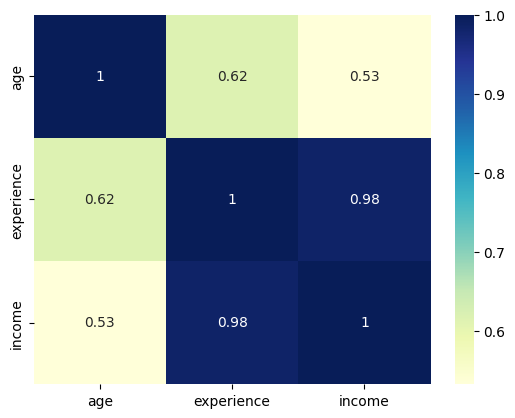

In [ ]:
sns.heatmap(df_data.corr(), cmap="YlGnBu", annot=True)

In [ ]:
# Step 3: Data Splitting: Divide the dataset into training and testing sets to allow for effective model evaluation.

In [ ]:
X = df_data["experience"]
Y = df_data["income"]

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

x_train.head(20)

16    17.0
1      3.0
9      8.0
14    12.0
12     5.0
5      7.0
2      2.0
4     10.0
10     1.0
0      1.0
15     6.0
7      4.0
3      5.0
8      5.0
Name: experience, dtype: float64

In [ ]:
import statsmodels.api as sm

x_train_sm = sm.add_constant(x_train)

linear_reg = sm.OLS(y_train, x_train_sm).fit()

In [ ]:
linear_reg.params

const         28032.997800
experience     2049.279428
dtype: float64

In [ ]:
linear_reg.summary()
# The Kurtosis test will issue a warning if the number of rows is <= 20 in this case we have just 20 rows in the dataframe

/opt/anaconda3/envs/ml-env-1/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     516.6
Date:                Thu, 31 Oct 2024   Prob (F-statistic):           3.12e-11
Time:                        16:36:44   Log-Likelihood:                -120.73
No. Observations:                  14   AIC:                             245.5
Df Residuals:                      12   BIC:                             246.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.803e+04    676.406     41.444      0.000    2.66e+04    2.95e+04
experience  2049.2794     90.159     22.730      0.000    1852.840    2245.719
==============================================================================
Omnibus:                        2.835   Durbin-Watson:                   1.061
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                1.070
Skew:                          -0.008   Prob(JB):                        0.586
Kurtosis:                       1.646   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='experience', ylabel='income'>

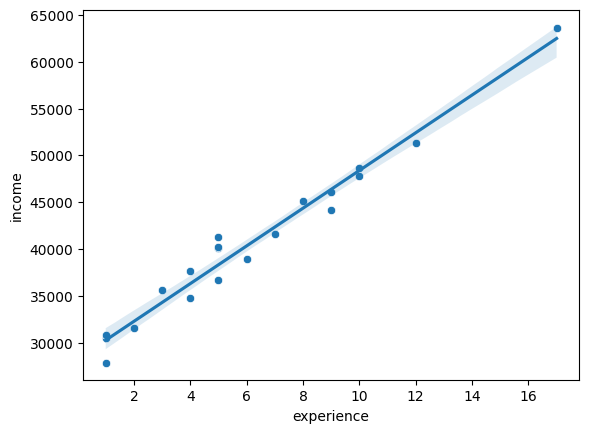

In [ ]:
ax = sns.scatterplot(df_data, x="experience", y="income")
sns.regplot(data=df_data, x="experience", y="income", scatter=False, ax=ax)

In [ ]:
multi_x = df_data[["age", "experience"]]
mx_train, mx_test, my_train, my_test = train_test_split(multi_x, Y, train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
from sklearn.linear_model import LinearRegression

multiLinReg = LinearRegression()
multiLinReg.fit(mx_train, my_train)

LinearRegression()

In [ ]:
y_prediction = multiLinReg.predict(mx_test)
y_prediction

array([30845.55700593, 49238.18653887, 46273.80412562, 46512.84678484,
       35117.21283408, 39117.44677062])

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(my_test, y_prediction)
score_train = r2_score(my_train, multiLinReg.predict(mx_train))

print("R-squared = " + str(score))
print("Training R-squared = " + str(score))

R-squared = 0.954580667408847
Training R-squared = 0.954580667408847
